In [1]:
import anndata
import itertools
import networkx as nx
import numpy as np
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/rna_preprocessed_test.h5ad")
hic = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/hic_preprocessed_test.h5ad")
graph = nx.read_graphml("/lmh_data/data/sclab/GSE223917/prior_test.graphml.gz")

In [4]:
rna.layers["counts"] = np.ceil(rna.layers["counts"])
scglue.num.all_counts(rna.layers["counts"])

True

In [5]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [6]:
scglue.models.configure_dataset(
    hic, "NB", use_highly_variable=True,
    use_rep="X_pca"
)

In [7]:
graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    hic.var.query("highly_variable").index
))

In [8]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "hic": hic}, graph,
    fit_kws={
        "directory": "glue",
#         "max_epochs": 60
    }
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 1 as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 24281
[INFO] SCGLUEModel: Setting `max_epochs` = 1207
[INFO] SCGLUEModel: Setting `patience` = 101
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 51
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.6, 'g_kl': 0.002, 'g_elbo': 0.602, 'x_rna_nll': 1.273, 'x_rna_kl': 0.046, 'x_rna_elbo': 1.319, 'x_hic_nll': 1.95, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.952, 'dsc_loss': 0.378, 'vae_loss': 3.295, 'gen_loss': 3.276}, val={'g_nll': 0.602, 'g_kl': 0.002, 'g_elbo': 0.604, 'x_rna_nll': 1.272, 'x_rna_kl': 0.04, 'x_rna_elbo': 1.312, 'x_hic_nll': 2.079, 'x_hic_kl': 0.003, 'x_hic_elbo': 2.082, 'dsc_loss'

[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.543, 'g_kl': 0.01, 'g_elbo': 0.553, 'x_rna_nll': 1.167, 'x_rna_kl': 0.032, 'x_rna_elbo': 1.199, 'x_hic_nll': 1.726, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.728, 'dsc_loss': 0.656, 'vae_loss': 2.948, 'gen_loss': 2.916}, val={'g_nll': 0.543, 'g_kl': 0.01, 'g_elbo': 0.552, 'x_rna_nll': 1.181, 'x_rna_kl': 0.032, 'x_rna_elbo': 1.213, 'x_hic_nll': 1.748, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.749, 'dsc_loss': 0.659, 'vae_loss': 2.984, 'gen_loss': 2.951}, 1.4s elapsed
Epoch 00166: reducing learning rate of group 0 to 2.0000e-05.
Epoch 00166: reducing learning rate of group 0 to 2.0000e-05.
[INFO] LRScheduler: Learning rate reduction: step 2
[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.542, 'g_kl': 0.01, 'g_elbo': 0.551, 'x_rna_nll': 1.168, 'x_rna_kl': 0.032, 'x_rna_elbo': 1.2, 'x_hic_nll': 1.726, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.728, 'dsc_loss': 0.653, 'vae_loss': 2.95, 'gen_loss': 2.917}, val={'g_nll': 0.542, 'g_kl': 0.01, 'g_elbo': 0.551, 

2023-06-29 17:46:02,606 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "258"...
[INFO] EarlyStopping: Restoring checkpoint "258"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (17, 17)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 24281
[INFO] SCGLUEModel: Setting `align_burnin` = 202
[INFO] SCGLUEModel: Setting `max_epochs` = 1207
[INFO] SCGLUEModel: Setting `patience` = 101
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 51
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.5

[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.492, 'g_kl': 0.009, 'g_elbo': 0.501, 'x_rna_nll': 1.173, 'x_rna_kl': 0.033, 'x_rna_elbo': 1.206, 'x_hic_nll': 1.729, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.731, 'dsc_loss': 0.636, 'vae_loss': 2.957, 'gen_loss': 2.925}, val={'g_nll': 0.492, 'g_kl': 0.009, 'g_elbo': 0.501, 'x_rna_nll': 1.176, 'x_rna_kl': 0.032, 'x_rna_elbo': 1.208, 'x_hic_nll': 1.783, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.785, 'dsc_loss': 0.636, 'vae_loss': 3.013, 'gen_loss': 2.981}, 1.3s elapsed
[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.493, 'g_kl': 0.009, 'g_elbo': 0.502, 'x_rna_nll': 1.168, 'x_rna_kl': 0.033, 'x_rna_elbo': 1.201, 'x_hic_nll': 1.731, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.733, 'dsc_loss': 0.643, 'vae_loss': 2.953, 'gen_loss': 2.921}, val={'g_nll': 0.492, 'g_kl': 0.009, 'g_elbo': 0.501, 'x_rna_nll': 1.194, 'x_rna_kl': 0.032, 'x_rna_elbo': 1.226, 'x_hic_nll': 1.768, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.77, 'dsc_loss': 0.61, 'vae_loss': 3.016, 'gen_loss': 2

[INFO] SCGLUETrainer: [Epoch 320] train={'g_nll': 0.484, 'g_kl': 0.009, 'g_elbo': 0.492, 'x_rna_nll': 1.165, 'x_rna_kl': 0.032, 'x_rna_elbo': 1.197, 'x_hic_nll': 1.724, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.726, 'dsc_loss': 0.676, 'vae_loss': 2.943, 'gen_loss': 2.909}, val={'g_nll': 0.486, 'g_kl': 0.009, 'g_elbo': 0.494, 'x_rna_nll': 1.183, 'x_rna_kl': 0.031, 'x_rna_elbo': 1.214, 'x_hic_nll': 1.874, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.876, 'dsc_loss': 0.596, 'vae_loss': 3.11, 'gen_loss': 3.08}, 1.3s elapsed
[INFO] SCGLUETrainer: [Epoch 330] train={'g_nll': 0.484, 'g_kl': 0.009, 'g_elbo': 0.493, 'x_rna_nll': 1.168, 'x_rna_kl': 0.032, 'x_rna_elbo': 1.2, 'x_hic_nll': 1.725, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.726, 'dsc_loss': 0.667, 'vae_loss': 2.946, 'gen_loss': 2.912}, val={'g_nll': 0.483, 'g_kl': 0.009, 'g_elbo': 0.491, 'x_rna_nll': 1.179, 'x_rna_kl': 0.032, 'x_rna_elbo': 1.21, 'x_hic_nll': 2.191, 'x_hic_kl': 0.002, 'x_hic_elbo': 2.193, 'dsc_loss': 0.576, 'vae_loss': 3.423, 'gen_loss': 3.39

2023-06-29 17:57:36,901 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "376"...
[INFO] EarlyStopping: Restoring checkpoint "376"...


In [9]:
glue.save("/lmh_data/data/sclab/GSE223917/glue_test.dill")

In [10]:
# dx = scglue.models.integration_consistency(
#     glue, {"rna": rna, "hic": hic}, graph,
#     count_layers={"rna": "counts"}
# )
# dx

In [11]:
# _ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [12]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
hic.obsm["X_glue"] = glue.encode_data("hic", hic)

combined = anndata.concat([rna, hic])

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


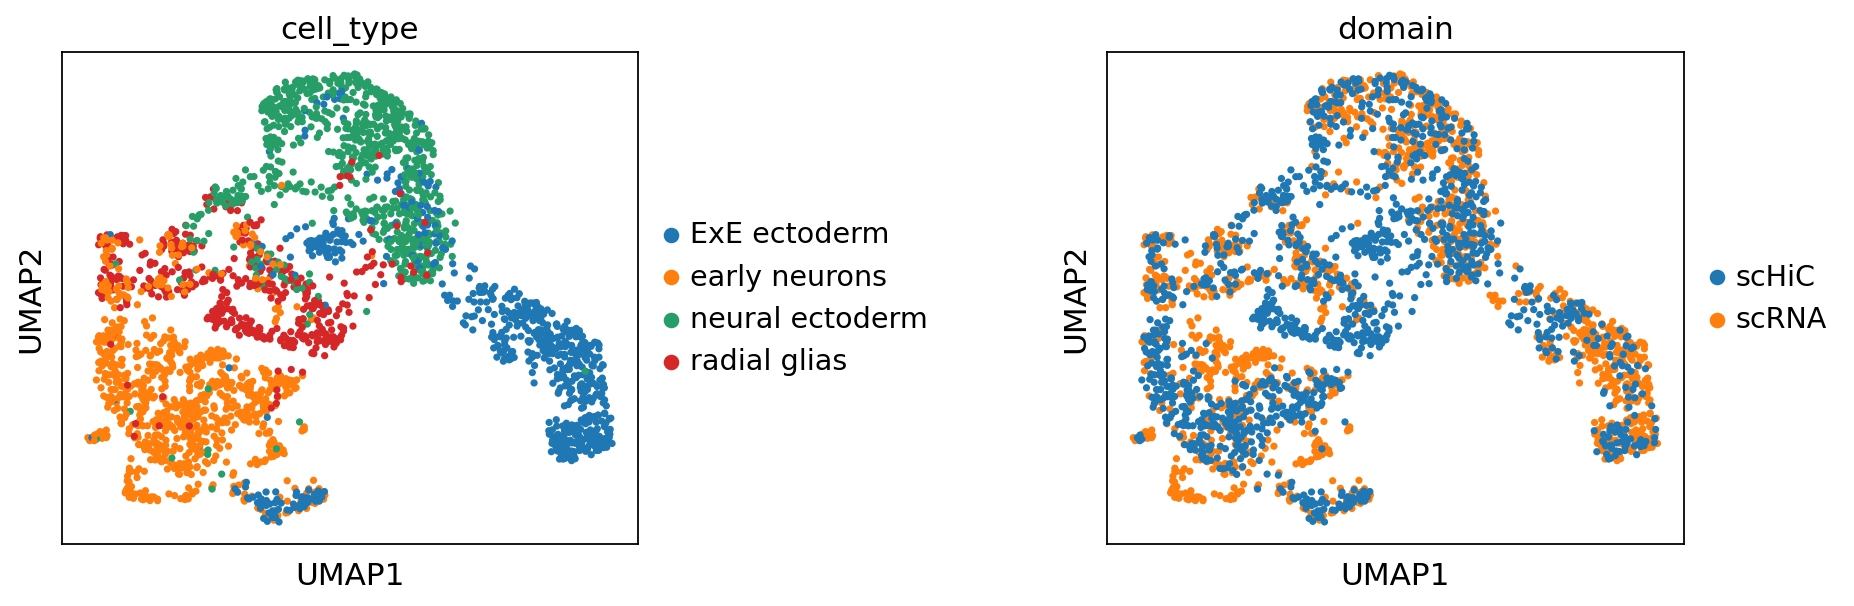

In [13]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


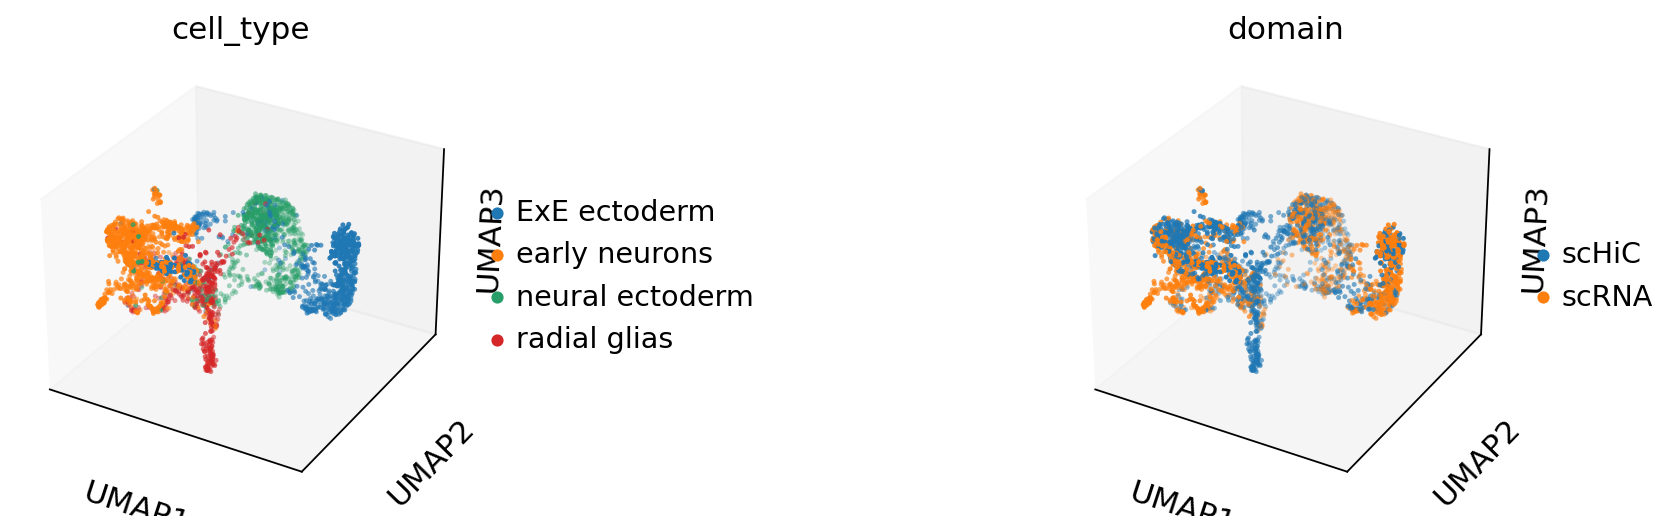

In [14]:
sc.tl.umap(combined, n_components=3)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65, projection='3d')

<IPython.core.display.Javascript object>


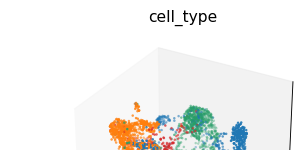

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


In [15]:
%matplotlib notebook
sc.pl.umap(combined, color=["cell_type"], projection='3d')

In [16]:
rna.write("/lmh_data/data/sclab/GSE223917/rna_result_test.h5ad", compression="gzip")
hic.write("/lmh_data/data/sclab/GSE223917/hic_result_test.h5ad", compression="gzip")